In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [112]:
df = pd.read_csv(r"D:\Data Science\csv file code\poland car\data.csv")


In [113]:
df.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


Data Preprocessing Part 1

In [114]:
#check the unique element
df.select_dtypes(include='object').nunique()

brand                 43
model              18641
mileage            14154
gearbox                2
engine_capacity      640
fuel_type           1267
city                4392
voivodeship           26
year                 349
dtype: int64

In [115]:
#remove model and city bcoz there are too many unique value
df.drop(columns=['model','city','fuel_type'],inplace=True)
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133 760 km,manual,1 970 cm3,Łódzkie,1998
1,alfa-romeo,14000.0,133 760 km,manual,1 970 cm3,Mazowieckie,1998
2,alfa-romeo,4500.0,227 000 km,manual,1 970 cm3,Kujawsko-pomorskie,1996
3,alfa-romeo,17100.0,227 000 km,manual,1 970 cm3,Podkarpackie,1996
4,alfa-romeo,3900.0,239 000 km,manual,1 995 cm3,Łódzkie,1995


In [116]:
#remove string and space from the 'mileage' column
df['mileage'] = df['mileage'].str.replace(r'\D','',regex=True)
df['mileage'] = df['mileage'].apply(lambda x: float(x) if x!= ''else float('nan'))

In [117]:
#remove the last character from the 'engine_capacity' column
df['engine_capacity'] = df['engine_capacity'].str[:-1]

In [118]:
#remove string and space from the 'engine_capacity' column 
df['engine_capacity']= df['engine_capacity'].str.replace(r'\D', '', regex =True)
df['engine_capacity']= df['engine_capacity'].apply(lambda x: float(x) if x!= '' else('nan'))

In [119]:
#remove string and space from the 'year' column
df['year'] = df['year'].str.replace(r'\D', '', regex= True)
df['year'] = df['year'].apply(lambda x: float(x) if x!= '' else('nan'))

In [120]:

# Convert "engine_capacity" to float64
df["engine_capacity"] = df["engine_capacity"].astype("float64")

# Convert "year" to float64
df["year"] = df["year"].astype("float64")

In [121]:
df.dtypes

brand               object
price_in_pln       float64
mileage            float64
gearbox             object
engine_capacity    float64
voivodeship         object
year               float64
dtype: object

In [122]:
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133760.0,manual,1970.0,Łódzkie,1998.0
1,alfa-romeo,14000.0,133760.0,manual,1970.0,Mazowieckie,1998.0
2,alfa-romeo,4500.0,227000.0,manual,1970.0,Kujawsko-pomorskie,1996.0
3,alfa-romeo,17100.0,227000.0,manual,1970.0,Podkarpackie,1996.0
4,alfa-romeo,3900.0,239000.0,manual,1995.0,Łódzkie,1995.0


Check Year column

In [123]:
df.year.unique()

array([1.99800e+03, 1.99600e+03, 1.99500e+03, 2.00400e+03, 2.00300e+03,
       2.00000e+03, 2.00200e+03, 2.00100e+03, 2.00800e+03, 2.00600e+03,
       2.00900e+03, 2.00700e+03, 2.01500e+03, 2.01600e+03, 2.01700e+03,
       2.01800e+03, 2.01400e+03, 2.01200e+03, 2.01000e+03, 2.01300e+03,
       2.01100e+03, 2.02200e+03, 2.00500e+03, 2.01900e+03, 2.02000e+03,
       2.02100e+03, 2.02300e+03, 1.99900e+03, 1.99700e+03, 5.00000e+00,
       3.99630e+04, 1.98430e+04, 1.49830e+04, 1.96830e+04, 2.48030e+04,
               nan, 5.00000e+01, 5.20430e+04, 1.39530e+04, 2.99530e+04,
       1.00000e+01, 9.40000e+04, 1.99530e+04, 1.99730e+04, 2.99330e+04,
       9.00000e+04, 2.97930e+04, 3.00030e+04, 1.15000e+05, 3.20000e+04,
       4.39530e+04, 7.15000e+04, 4.20050e+04, 4.00000e+04, 1.99830e+04,
       4.40520e+04, 2.01630e+04, 1.49930e+04, 1.95560e+04, 1.49630e+04,
       4.24000e+04, 1.19000e+05, 6.47300e+03, 1.06425e+05, 3.30000e+04,
       1.29600e+05, 2.00030e+04, 3.10000e+04, 2.99830e+04, 6.869

In [124]:
df.shape

(91523, 7)

In [125]:
#remove rows where year > 2023 or year < 1995
df = df.loc[(df['year'] <= 2023) & (df['year'] >= 1995)]
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,alfa-romeo,14700.0,133760.0,manual,1970.0,Łódzkie,1998.0
1,alfa-romeo,14000.0,133760.0,manual,1970.0,Mazowieckie,1998.0
2,alfa-romeo,4500.0,227000.0,manual,1970.0,Kujawsko-pomorskie,1996.0
3,alfa-romeo,17100.0,227000.0,manual,1970.0,Podkarpackie,1996.0
4,alfa-romeo,3900.0,239000.0,manual,1995.0,Łódzkie,1995.0


In [126]:
df.shape

(86274, 7)

Segment Brand Unique Value into Smaller Number

In [127]:
df['brand'].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'citroen', 'dacia', 'daewoo', 'daihatsu', 'dodge',
       'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti', 'isuzu',
       'jaguar', 'jeep', 'kia', 'lamborghini', 'lancia', 'land-rover',
       'maserati', 'mazda', 'mercedes-benz', 'mini', 'mitsubishi',
       'nissan', 'opel', 'peugeot', 'porsche', 'renault', 'rover', 'saab',
       'seat', 'skoda', 'smart', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [128]:
#function to segment brands based on car type
def segment_car_type(brand):
    if brand in ['alfa-romeo', 'aston-martin','maserati','porsche','ferrari', 'lamborghini' ]:
        return 'Sports Car'
    elif brand in ['audi','bmw','mercedes-benz','bentley','volkswagen']:
        return 'Luxury Car'
    elif brand in ['cadillac','chevrolet','nissan','ford','mazda', 'honda','kia', 'hyundai','toyota']:
        return 'Sedan'
    elif brand in ['isuzu','jeep','land-rover']:
        return'SUV'
    else: 
        return 'Other'

In [129]:
#apply in brand 
df['brand'] = df['brand'].apply(segment_car_type)

<Axes: xlabel='brand'>

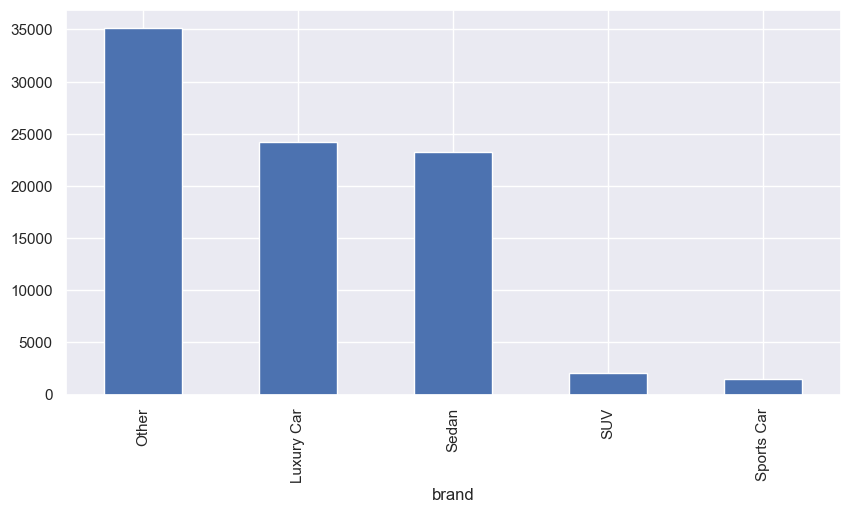

In [130]:
plt.figure(figsize=(10, 5))
df['brand'].value_counts().plot(kind='bar')


Segment Voivodeship Unique Value into Smaller Number

In [131]:
df['voivodeship'].unique()

array(['Łódzkie', 'Mazowieckie', 'Kujawsko-pomorskie', 'Podkarpackie',
       'Wielkopolskie', 'Pomorskie', 'Małopolskie', 'Podlaskie',
       'Śląskie', 'Dolnośląskie', 'Lubelskie', 'Świętokrzyskie',
       'Zachodniopomorskie', 'Lubuskie', 'Opolskie',
       'Warmińsko-mazurskie', 'Praga', 'Moravian-Silesian Region',
       'Brandenburg', 'Rheinland-Pfalz', 'Anglia', 'Berlin', 'Hessen',
       'Jihomoravský kraj', 'Nordrhein-Westfalen'], dtype=object)

In [132]:
#function to group voivodeships based on region
def group_voivodeship(voivodeship):
    if voivodeship in ['Łódzkie', 'Warmińsko-mazurskie','Podlaskie','Mazowieckie','Lubelskie']:
        return 'East Poland'
    elif voivodeship in ['Wielkopolskie','Opolskie','Lubuskie','Dolnośląskie']:
        return 'Western Poland'
    elif voivodeship in ['Małopolskie','Świętokrzyskie','Podkarpackie']:
        return 'South Poland'
    elif voivodeship in ['Pomorskie', 'Zachodniopomorskie']:
        return 'North Poland'
    else:
        return 'Other'

In [133]:
#apply the function to the 'voivodeship' column
df['voivodeship'] = df['voivodeship'].apply(group_voivodeship)

<Axes: xlabel='voivodeship'>

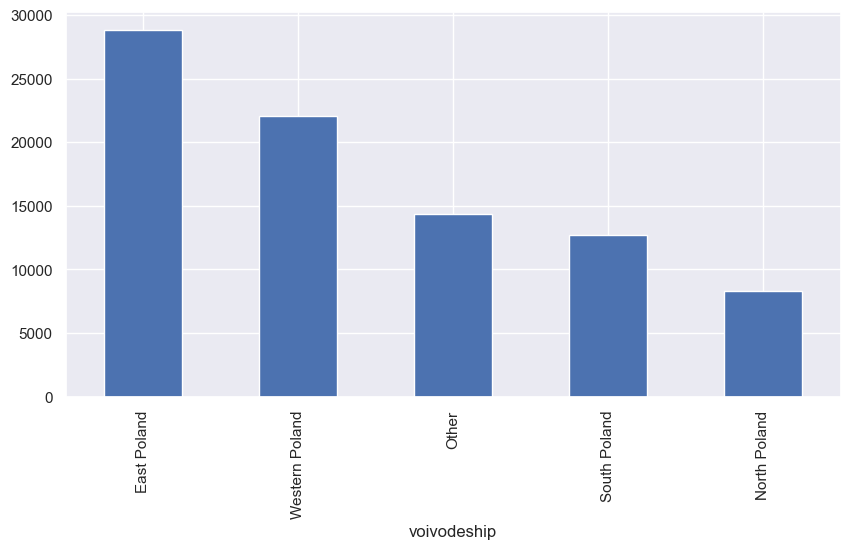

In [134]:
plt.figure(figsize=(10,5))
df['voivodeship'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

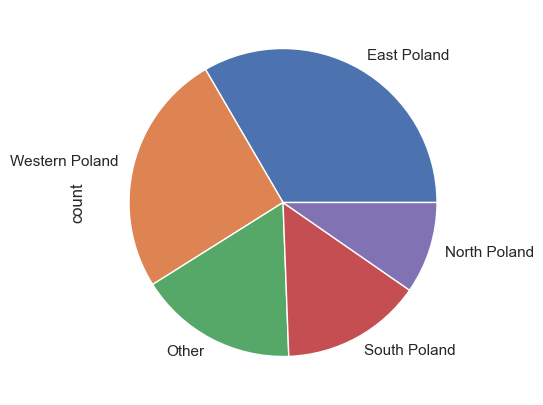

In [135]:
plt.figure(figsize=(10,5))
df['voivodeship'].value_counts().plot(kind='pie')

In [136]:
df.head()

,brand,price_in_pln,mileage,gearbox,engine_capacity,voivodeship,year
0,Sports Car,14700.0,133760.0,manual,1970.0,East Poland,1998.0
1,Sports Car,14000.0,133760.0,manual,1970.0,East Poland,1998.0
2,Sports Car,4500.0,227000.0,manual,1970.0,Other,1996.0
3,Sports Car,17100.0,227000.0,manual,1970.0,South Poland,1996.0
4,Sports Car,3900.0,239000.0,manual,1995.0,East Poland,1995.0


In [137]:
df.dtypes

brand               object
price_in_pln       float64
mileage            float64
gearbox             object
engine_capacity    float64
voivodeship         object
year               float64
dtype: object

In [138]:
df.select_dtypes(include='object').nunique()

brand          5
gearbox        2
voivodeship    5
dtype: int64

Exploratory Data Analysis

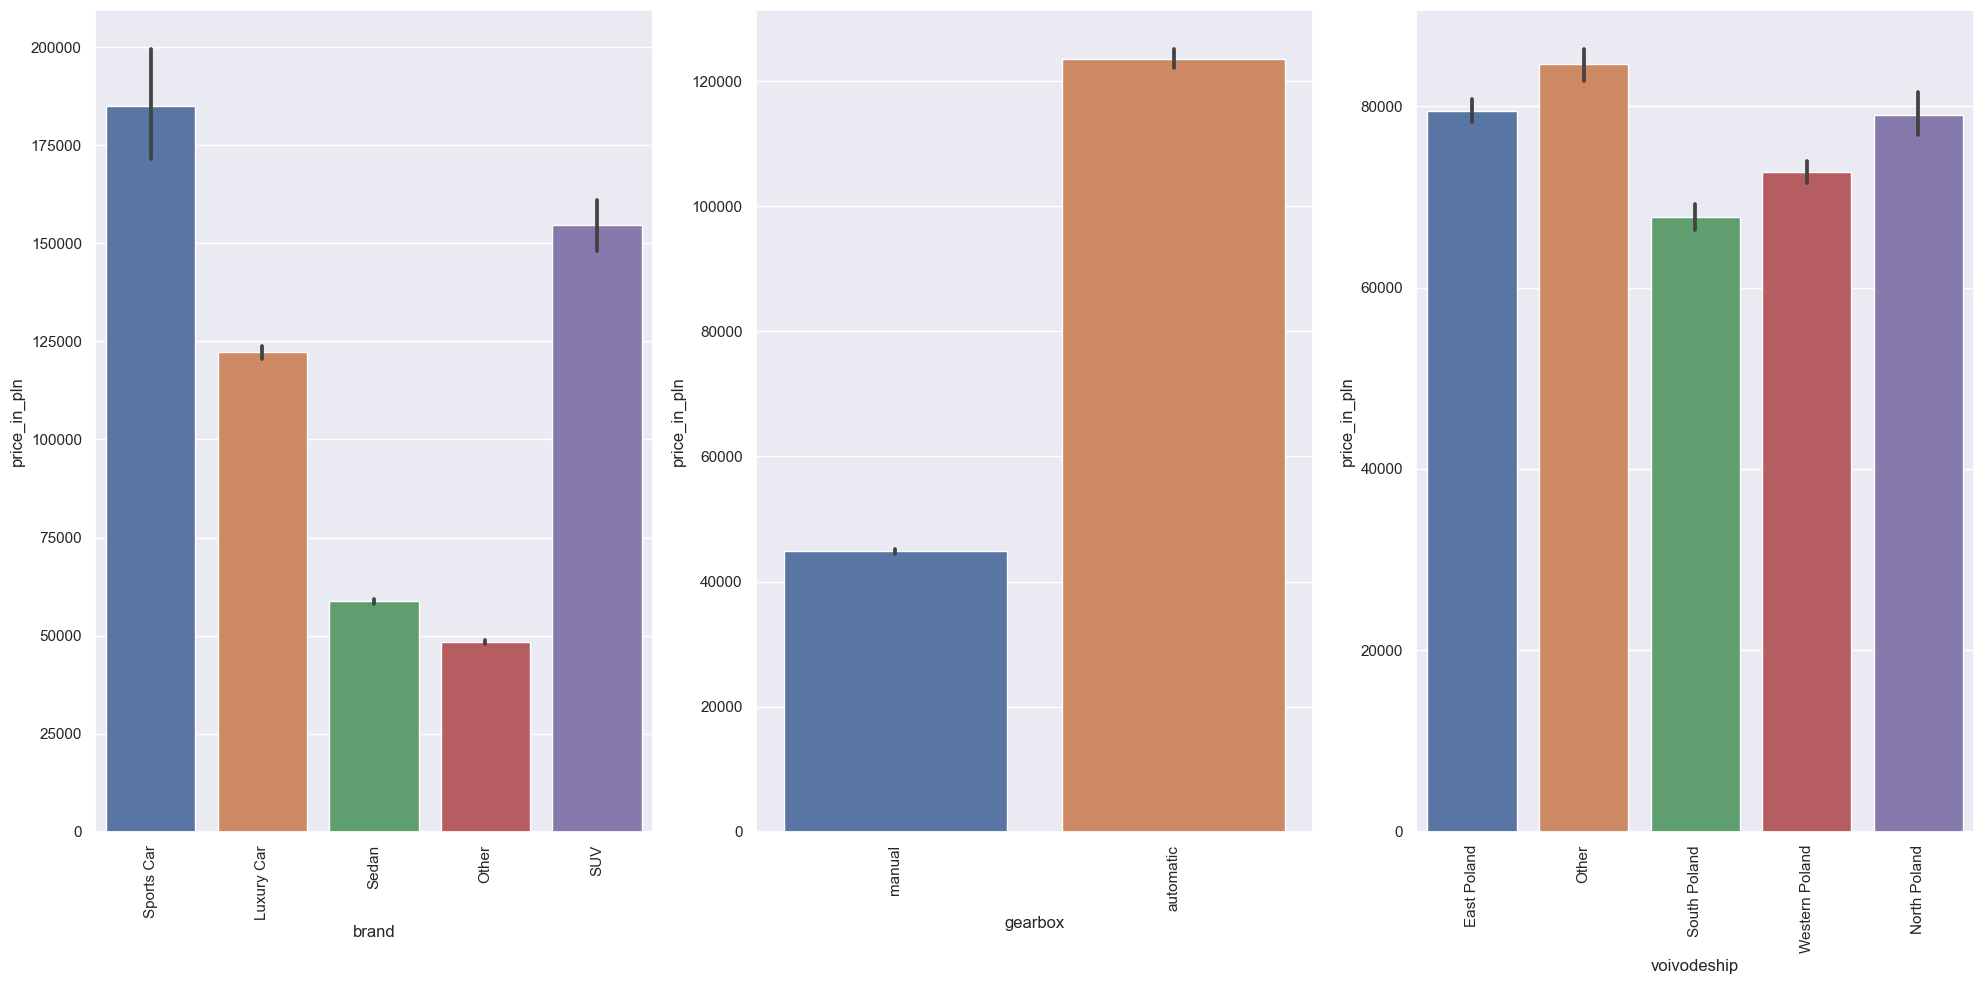

In [139]:
# list of categorical variables to plot
cat_vars = ['brand', 'gearbox', 'voivodeship']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# bar plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_in_pln', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Fix the typo here

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


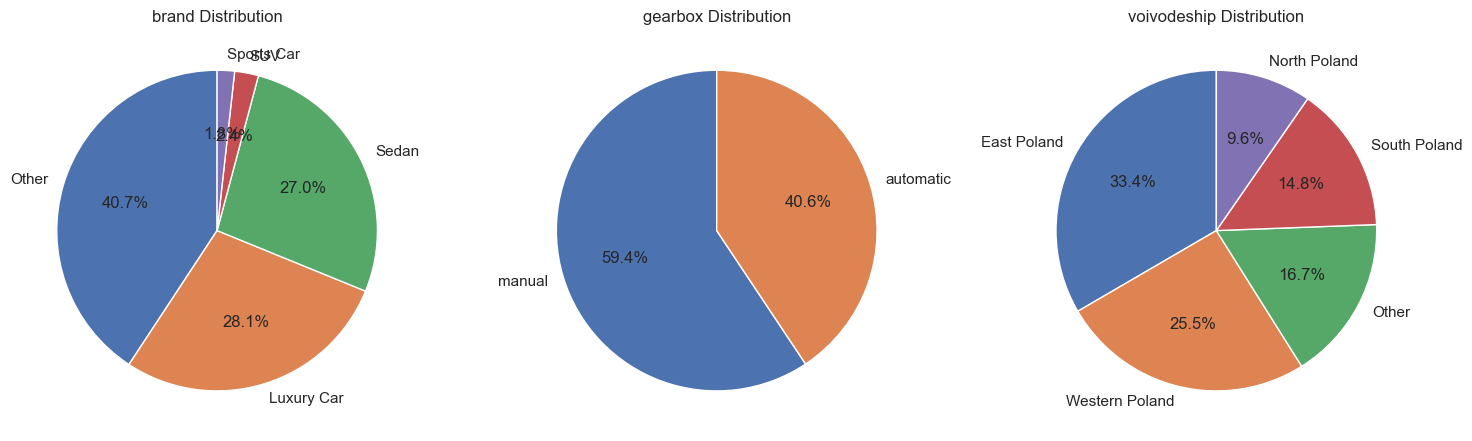

In [140]:
#specify the maximum number of categories to show individually
max_categories = 5

cat_vars =['brand','gearbox','voivodeship']

#create a figure and axes
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,30))

#create a pie chart for each categorical variable
for i,var in enumerate(cat_vars):
    if i< len(axs.flat):
        #count the number of occurence for each category
        cat_counts = df[var].value_counts()

        #Group categories beyonf the to max_categories as'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories : ].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        #create a pie chart 
        axs.flat[i].pie(cat_counts,labels = cat_counts.index, autopct= '%1.1f%%', startangle=90)

        #set atitle for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

#adjust spacing between suplots
fig.tight_layout()

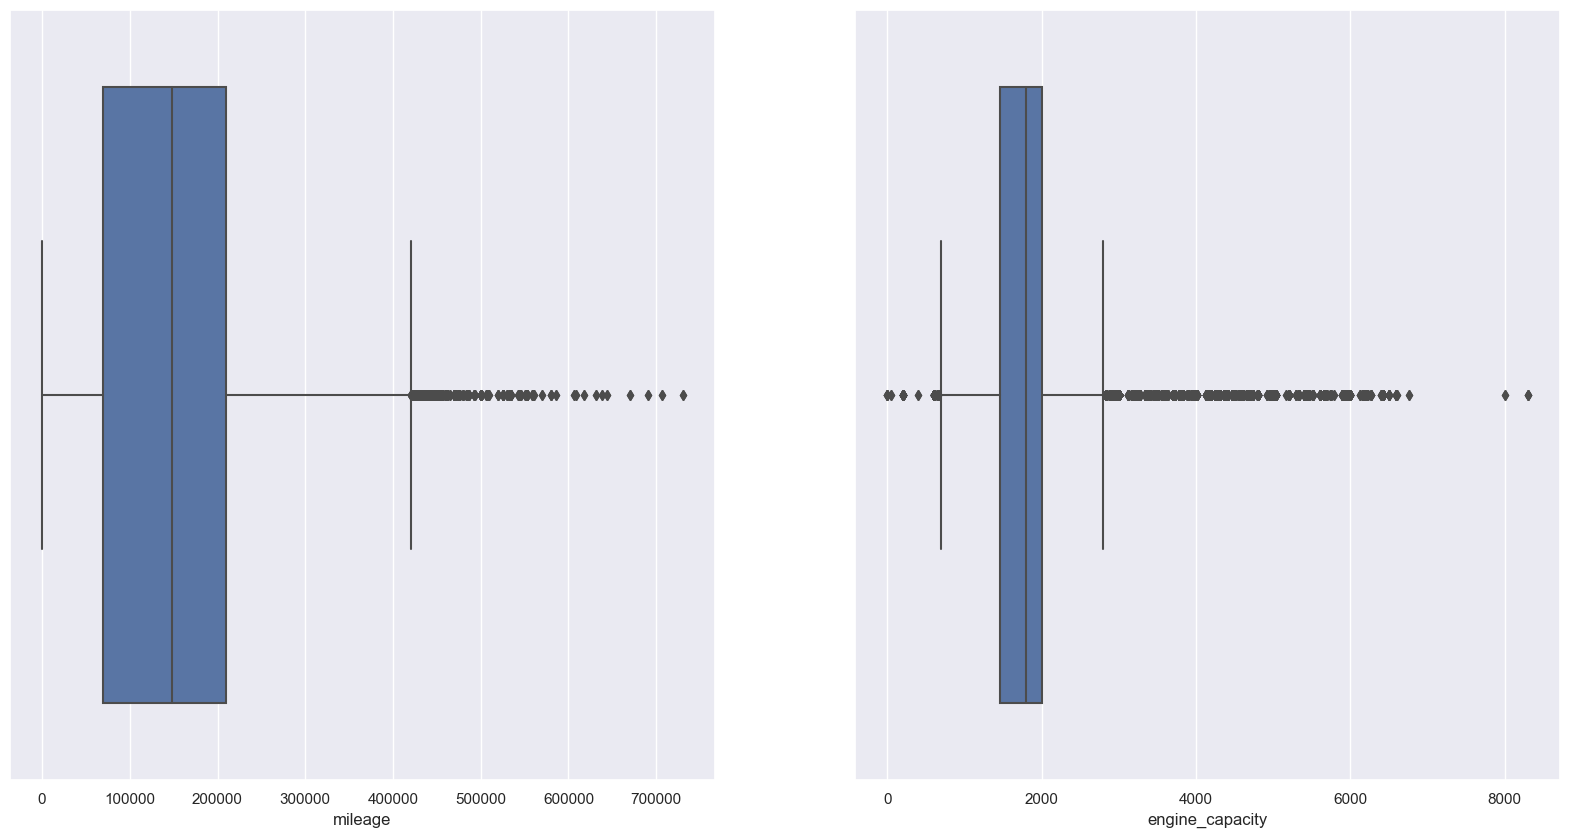

In [141]:
num_vars = ['mileage', 'engine_capacity']

fig, axs = plt.subplots(nrows=1 , ncols=2, figsize=(20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.boxplot(x= var, data = df , ax= axs[i])

plt.show()

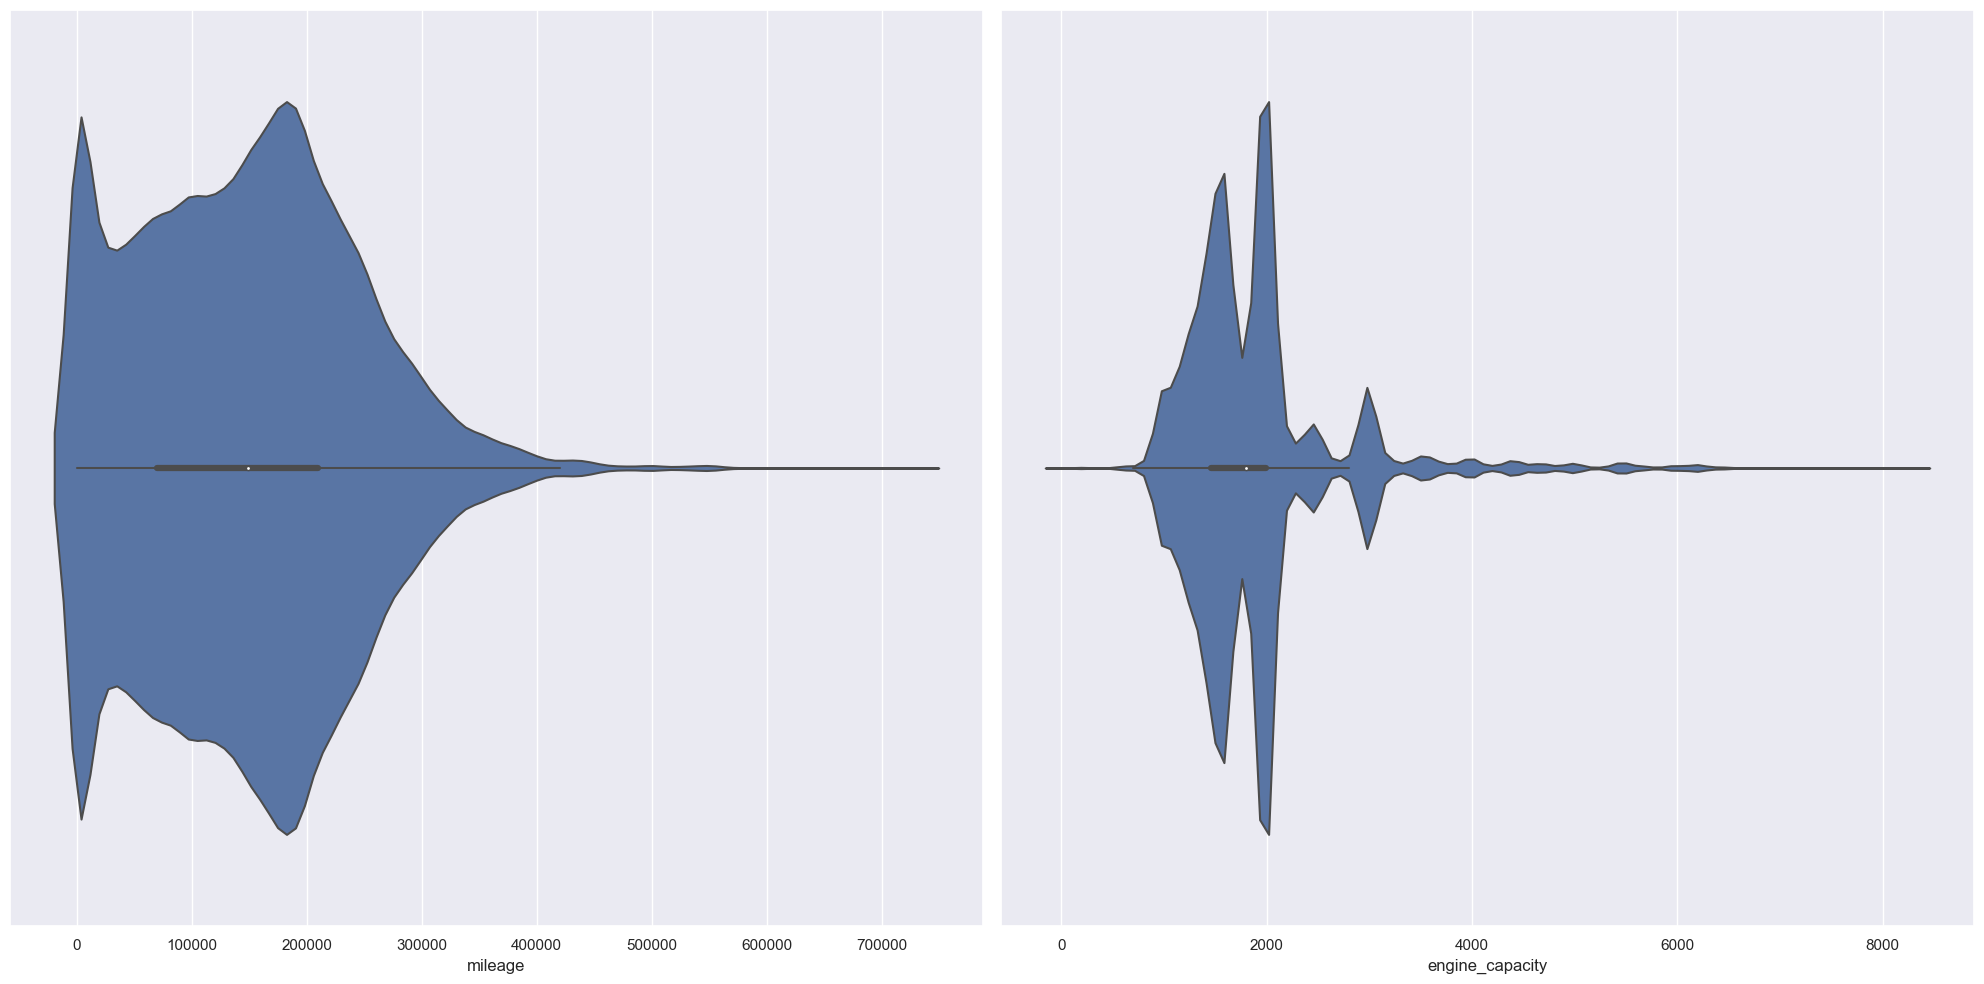

In [142]:
num_vars = ['mileage','engine_capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axs = axs.flatten()

for i,var in enumerate(num_vars):
    sns.violinplot(x=var, data=df,ax=axs[i])

fig.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5628\3332146337.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price_in_pln', hue='brand', data=df, ci=None, estimator='mean', alpha=0.7)


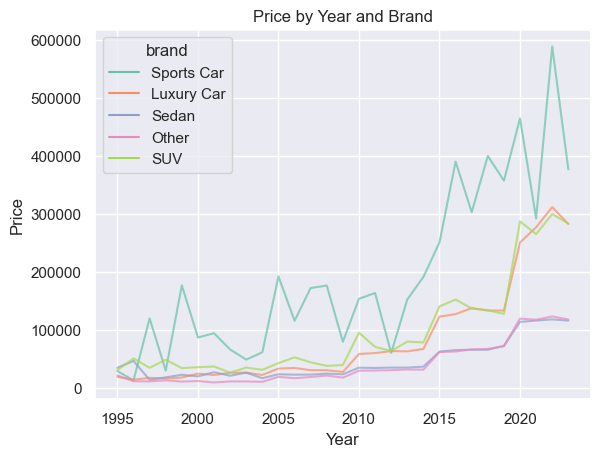

In [143]:
# Set style and palette
sns.set_style("darkgrid")
sns.set_palette("Set2")

# Create line plot
sns.lineplot(x='year', y='price_in_pln', hue='brand', data=df, ci=None, estimator='mean', alpha=0.7)

# Set title, x-label, and y-label
plt.title("Price by Year and Brand")
plt.xlabel("Year")
plt.ylabel("Price")

# Show the plot
plt.show()

Data Preprocessing Part 2

In [144]:
#check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

engine_capacity    0.652572
mileage            0.039409
dtype: float64

In [145]:
df.shape

(86274, 7)

In [146]:
#drop rows with missing values in 'engine_capacity' and 'mileage' column
df.dropna(subset=['engine_capacity','mileage'],inplace = True)

In [147]:
df.shape

(85677, 7)

Label Encoding for each Object datatype

In [148]:
#loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

brand: ['Sports Car' 'Luxury Car' 'Sedan' 'Other' 'SUV']
gearbox: ['manual' 'automatic']
voivodeship: ['East Poland' 'Other' 'South Poland' 'Western Poland' 'North Poland']


In [149]:
from sklearn import preprocessing 

#loop over each column in DataFrame where dtype is "object "
for col in df.select_dtypes(include=['object']).columns:

    #Initialize a Lable encoder 
    label_encoder = preprocessing.LabelEncoder()

    #fit the encoder to unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using encoder
    df[col] = label_encoder.transform(df[col])

    #print th ecolumn name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

brand: [4 0 3 1 2]
gearbox: [1 0]
voivodeship: [0 2 3 4 1]


Correlation Heatmap

<Axes: >

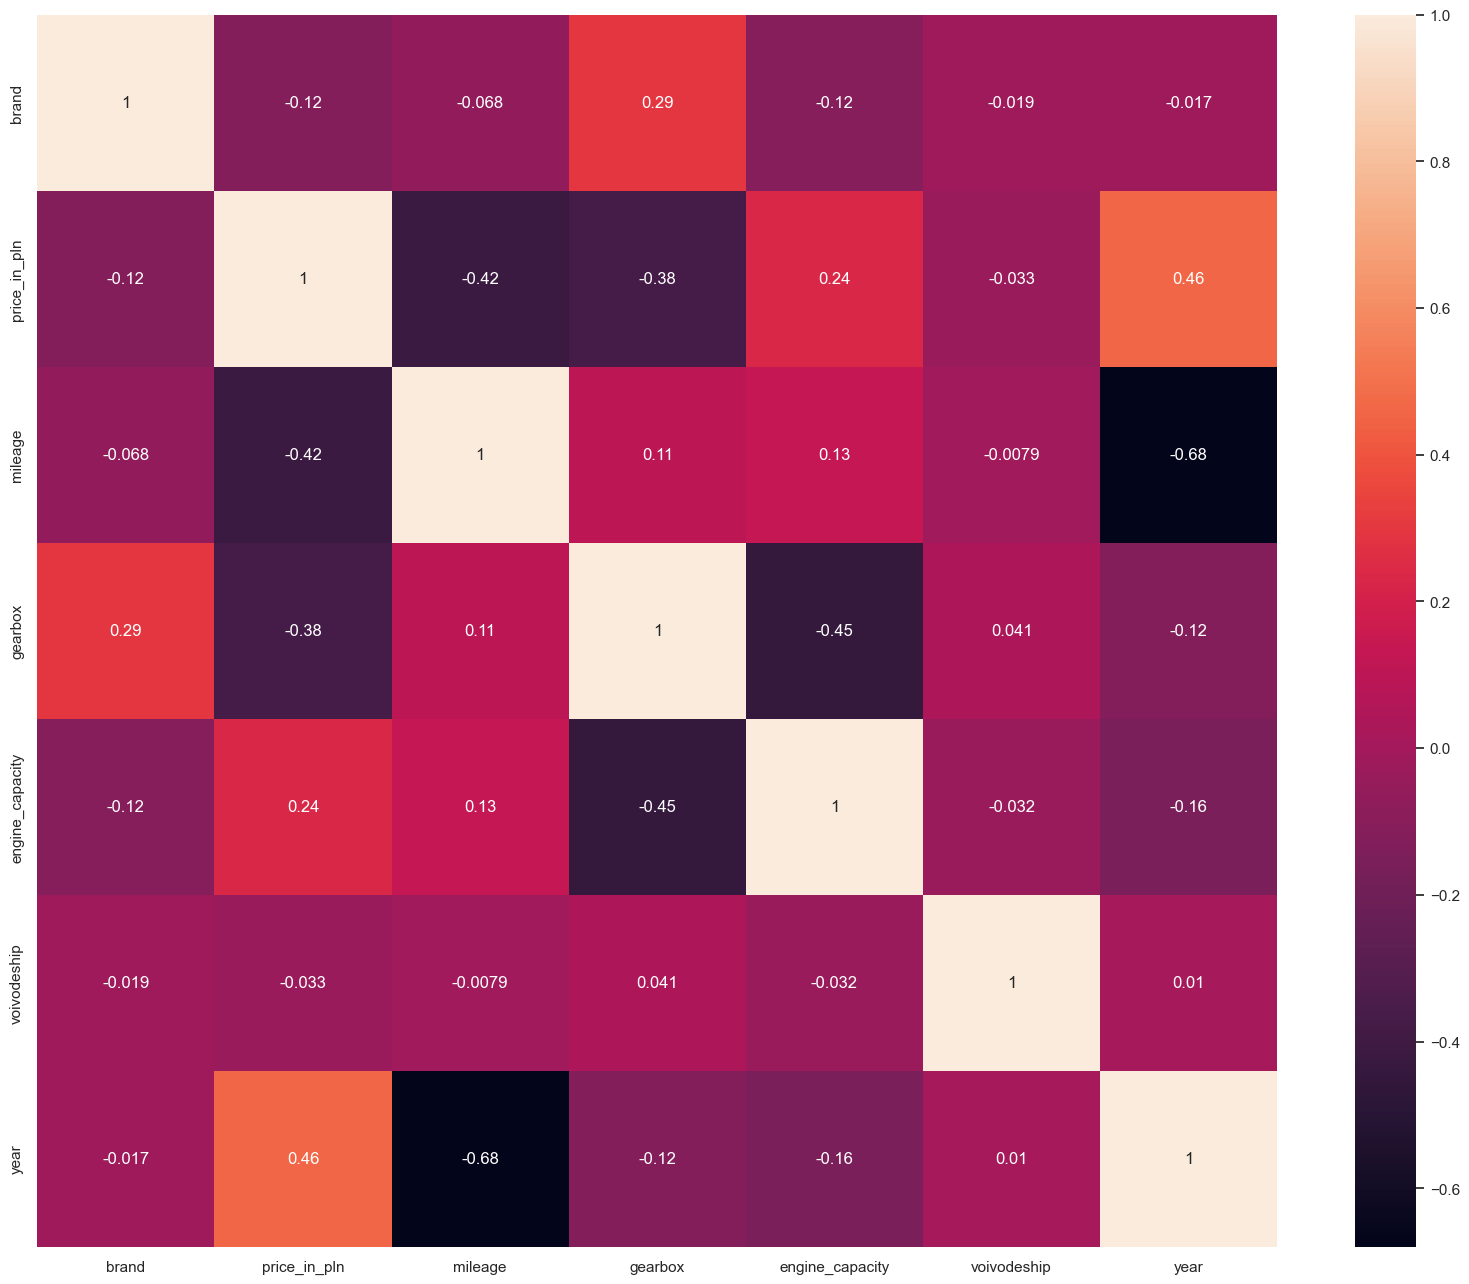

In [150]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
#select feature(x) and target(Y)

X= df.drop('price_in_pln',axis=1)
y = df['price_in_pln']

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Remove the Outlier from train data using Z-score

In [152]:
from scipy import stats

In [153]:
from scipy import stats

# Column(s) for which you want to remove outliers
selected_columns = ['mileage', 'engine_capacity']

# Calculate the z-score for the selected column(s) in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set threshold value for outlier detection (e.g., 3)
threshold = 3

# Find indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Reset the indices after removing outliers
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


Decision Tree Regressor

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing


In [155]:
#create a DicisionTreeRegressor object
dtree = DecisionTreeRegressor()

#define the hyperparameter to tune and their values
param_grid= {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf' : [1,2,3,4],
    'max_features' : ['auto' , 'sqrt', 'log2'],
    'random_state' : [0,42]
}

#create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5,scoring='neg_mean_squared_error')

#fit the GridSEarchCV object to the data
grid_search.fit(X_train,y_train)



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='neg_mean_squared_error')

In [156]:
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42}


In [157]:
from sklearn.tree import DecisionTreeRegressor

# Create the DecisionTreeRegressor with the correct parameters
dtree = DecisionTreeRegressor(random_state=42, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6)

# Fit the model to the training data
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                      random_state=42)

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

# create a Decision Tree Regressor object
dtree = DecisionTreeRegressor()

# fit the model on the training data
dtree.fit(X_train, y_train)

# make predictions on the test data
y_pred = dtree.predict(X_test)

# calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

# print the evaluation metrics
print('Mae is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


Mae is 35199.19455559147
MAPE is 0.5286188293943658
MSE is 7362566982.916457
R2 is 0.29970720132746376
RMSE score is 85805.40182830249


In [159]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

# Create and fit the DecisionTreeRegressor with the training data
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}%'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 35517.8471786243
MAPE is 52.561107287035625%
MSE is 8341612473.894999
R2 is 0.20658499157426935
RMSE score is 91332.4283805867


In [160]:
import numpy as np
from sklearn import metrics

# Calculate predictions
y_pred = dtree.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}%'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 35517.8471786243
MAPE is 52.561107287035625%
MSE is 8341612473.894999
R2 is 0.20658499157426935
RMSE score is 91332.4283805867


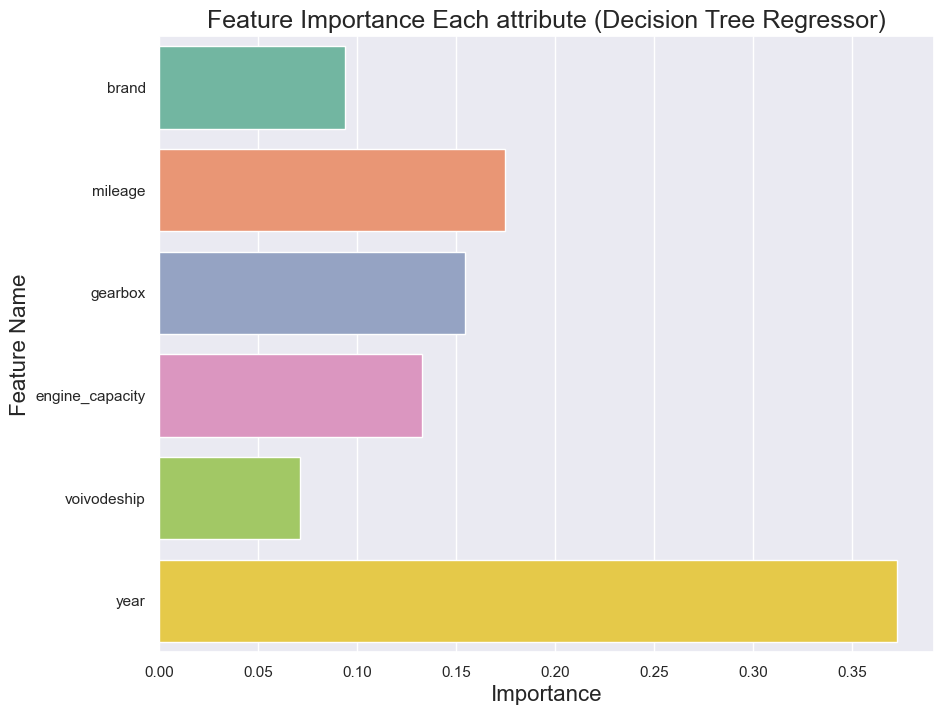

In [161]:
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance": dtree.feature_importances_
})
fi2 = imp_df.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each attribute (Decision Tree Regressor)' , fontsize = 18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()


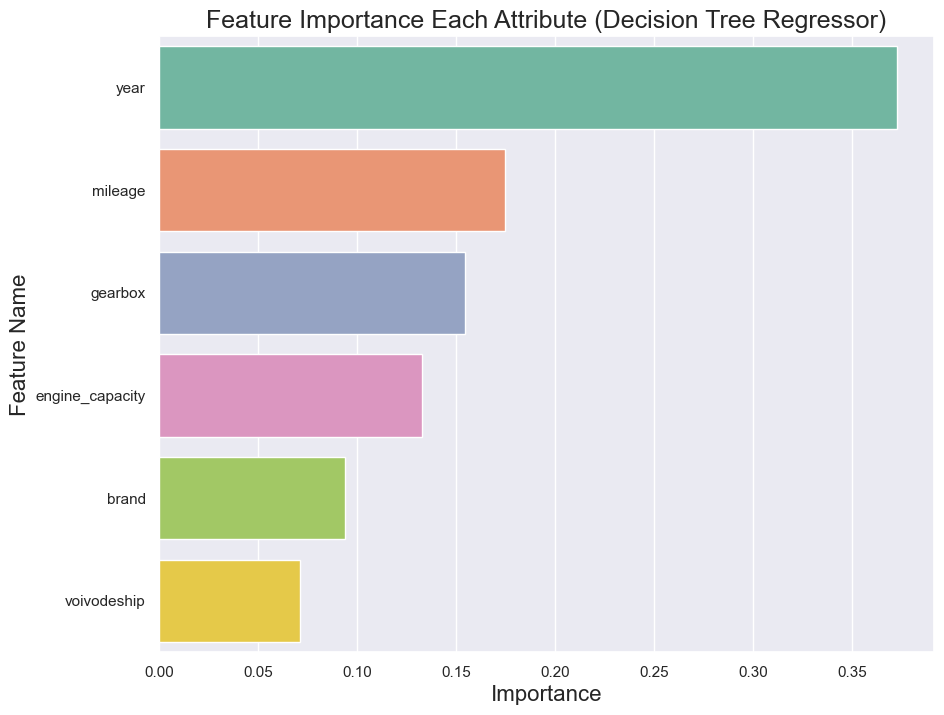

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame with feature names and their importance scores
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

# Sort the DataFrame based on the importance values and get the top 10 features
fi2 = imp_df.sort_values(by='Importance', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attribute (Decision Tree Regressor)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()


Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create random forest Regressor Object
rf = RandomForestRegressor()

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object with parallel processing
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\P

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [0, 42]},
             scoring='r2')

In [164]:
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [165]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, max_depth=9, min_samples_split=10, min_samples_leaf=2)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [166]:
import numpy as np
from sklearn import metrics

# Calculate predictions
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}%'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 29190.044882363687
MAPE is 49.76992301802556%
MSE is 4848145371.664639
R2 is 0.5388671779051903
RMSE score is 69628.62465728186


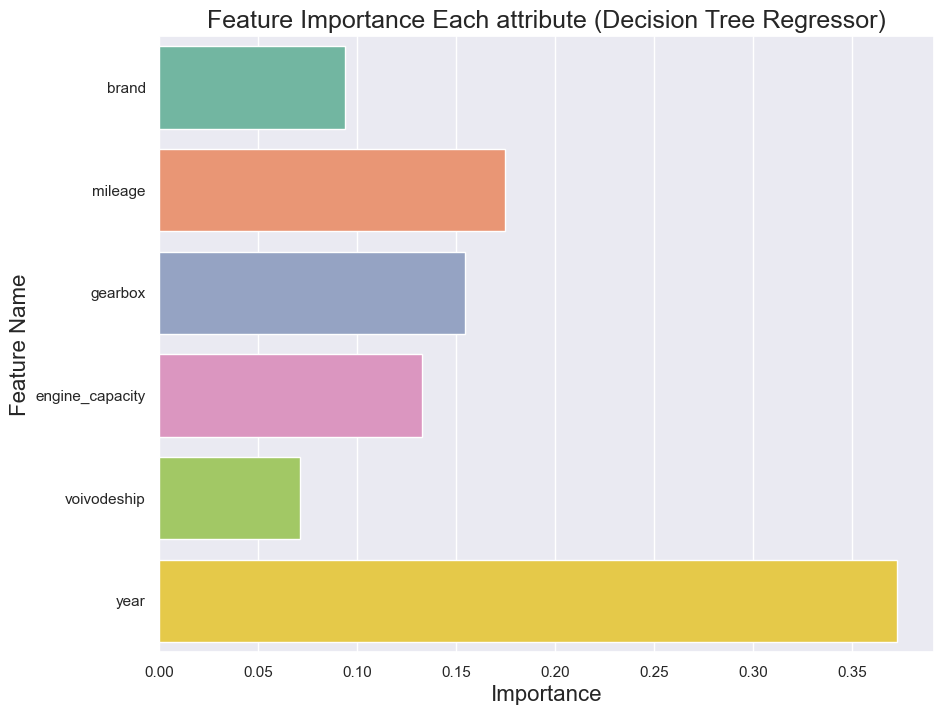

In [167]:
imp_df = pd.DataFrame({
    "Feature Name" : X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = imp_df.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each attribute (Decision Tree Regressor)' , fontsize = 18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()
